In [106]:
import tensorflow as tf

In [107]:
from tensorflow.examples.tutorials.mnist import input_data

In [108]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [109]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [110]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [111]:
type(mnist.train.images)

numpy.ndarray

In [112]:
mnist.train.images[2].shape

(784,)

In [113]:
sample=mnist.train.images[2].reshape(28,28)

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

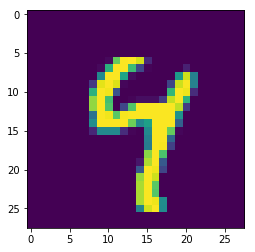

In [115]:
plt.imshow(sample)

In [116]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [117]:
#network parameters

n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10
n_samples = mnist.train.num_examples

In [118]:
n_samples

55000

In [119]:
x = tf.placeholder('float', [None,n_input])
y = tf.placeholder('float', [None,n_classes])

In [120]:
#Nultilayer Model

def multilayer_perceptron(x, weights, biases):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out'])+biases['out']
    return out_layer

In [121]:
weights = {
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [122]:
biases = { 
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [123]:
pred = multilayer_perceptron(x, weights, biases)

In [124]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

In [125]:
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(cost)

In [126]:
init = tf.global_variables_initializer()

In [127]:
Xsamp, ysamp = mnist.train.next_batch(1)

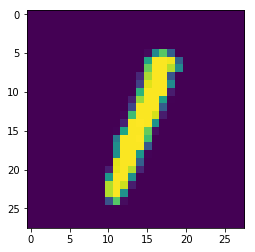

In [128]:
plt.imshow(Xsamp.reshape(28,28))

In [129]:
print(ysamp)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [130]:
sess = tf.InteractiveSession()

sess.run(init)

for epoch in range(training_epochs):
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch) :
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _, c = sess.run([optimizer, cost], feed_dict = {x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost = {: 4f}".format(epoch+1, avg_cost))

print("Model has completed {} Epochs of Traing".format(training_epochs))

/opt/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1 cost =  1748.662210
Epoch: 2 cost =  1723.485429
Epoch: 3 cost =  1697.491905
Epoch: 4 cost =  1671.584548
Epoch: 5 cost =  1646.000136
Epoch: 6 cost =  1620.875242
Epoch: 7 cost =  1596.312946
Epoch: 8 cost =  1572.556565
Epoch: 9 cost =  1549.397759
Epoch: 10 cost =  1527.038632
Epoch: 11 cost =  1505.251221
Epoch: 12 cost =  1483.868728
Epoch: 13 cost =  1463.263519
Epoch: 14 cost =  1443.238325
Epoch: 15 cost =  1423.593093
Model has completed 15 Epochs of Traing


In [132]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))

In [133]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [134]:
correct_predictions = tf.cast(correct_predictions,'float')

In [135]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [136]:
accuracy = tf.reduce_mean(correct_predictions)

In [137]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [141]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.0916
